# ITS02_Assigment Tugas Akhir 4_Kelompok 6

Salah satu masalah yang sering dialami oleh pengguna aplikasi Spotify adalah dimana musik yang ingin didengar oleh pengguna dijalankan secara acak atau telah diatur dalam daftar putar yang dikuratori oleh Spotify (baik berdasarkan bahasa maupun penyanyi) sehingga pengguna perlu memilih sendiri musik mana yang ingin didengar sesuai dengan mood pendengarnya. Oleh karena itu, proyek ini disusun dalam rangka memudahkan pengguna aplikasi Spotify untuk mengklasifikasikan musik dan mengurutkannya sesuai dengan mood. Algoritma ini akan menyortir musik dari Spotify dalam playlist pertama (musik bahagia, optimis, dan energik) atau playlist kedua (lambat, menenangkan, dan tenang) sesuai dengan atribut musik yang digunakan. Algoritma yang ingin kami buat adalah dengan mengklasifikasikan dari kedua playlist yang dipilih yang berisi beberapa lagu, dengan algoritma yang kami buat akan menghasilkan atau menunjukkan bahwa ada beberapa lagu di kedua playlist yang memiliki atribut musik yang sama. Playlists akan diklasifikasikan berdasarkan kualitas yang sama dan terdekat. Pengklasifikasian dilakukan menggunakan KNN algorithm. Data yang digunakan adalah data Spotify (Spotify merupakan sebuah layanan streaming musik dan podcast yang berbasis di Swedia) yang terdiri dari 199 lagu. Terdapat beberapa variabel, yaitu artist, track, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, dan time signature.

## Akses Untuk Scrapping Data dari Spotify dengan Credential
* Mengambil data langsung

In [1]:
!pip install spotipy

You should consider upgrading via the 'c:\users\bonda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
client_id = 'a6430793e3da43b9a8cbf7a048d99530'
client_secret = '8d02582819c5468fac71b916bc5906f3'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)

In [3]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Playlist 1
* First Playlist That We want to make class

In [4]:
# download playlists and convert into csv
id_test = sp.user_playlist_tracks('The Best Vibes 💖', 'https://open.spotify.com/playlist/7s09coXLGbofhNrwSusr4G?si=PxiHm8HWT7iJiLWiJ0chEA&utm_source=copy-link')['items'][0]['track']['id']
columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 200))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
playlist_ids = ['https://open.spotify.com/playlist/7s09coXLGbofhNrwSusr4G?si=PxiHm8HWT7iJiLWiJ0chEA&utm_source=copy-link', 'https://open.spotify.com/playlist/7s09coXLGbofhNrwSusr4G?si=PxiHm8HWT7iJiLWiJ0chEA&utm_source=copy-link']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('The Best Vibes 💖', 'https://open.spotify.com/playlist/7s09coXLGbofhNrwSusr4G?si=PxiHm8HWT7iJiLWiJ0chEA&utm_source=copy-link')['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,MKTO,Classic,0.72,0.791,1,-4.689,1,0.124,0.0384,0,0.157,0.756,102.071,audio_features,6FE2iI43OZnszFLuLtvvmg,spotify:track:6FE2iI43OZnszFLuLtvvmg,https://api.spotify.com/v1/tracks/6FE2iI43OZns...,https://api.spotify.com/v1/audio-analysis/6FE2...,175427,4
1,Dua Lipa,Levitating (feat. DaBaby),0.702,0.825,6,-3.787,0,0.0601,0.00883,0,0.0674,0.915,102.977,audio_features,5nujrmhLynf4yMoMtj8AQF,spotify:track:5nujrmhLynf4yMoMtj8AQF,https://api.spotify.com/v1/tracks/5nujrmhLynf4...,https://api.spotify.com/v1/audio-analysis/5nuj...,203064,4
2,Outkast,Hey Ya!,0.715,0.97,0,-2.206,1,0.0648,0.0644,0.000156,0.205,0.963,79.504,audio_features,3AszgPDZd9q0DpDFt4HFBy,spotify:track:3AszgPDZd9q0DpDFt4HFBy,https://api.spotify.com/v1/tracks/3AszgPDZd9q0...,https://api.spotify.com/v1/audio-analysis/3Asz...,239240,4
3,Harry Styles,Watermelon Sugar,0.548,0.816,0,-4.209,1,0.0465,0.122,0,0.335,0.557,95.39,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4
4,Farruko,Pepas,0.762,0.766,7,-3.955,1,0.0343,0.00776,0.00007,0.128,0.442,130.001,audio_features,2B4GHvToeLTOBB4QLzW3Ni,spotify:track:2B4GHvToeLTOBB4QLzW3Ni,https://api.spotify.com/v1/tracks/2B4GHvToeLTO...,https://api.spotify.com/v1/audio-analysis/2B4G...,287120,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Portugal. The Man,Feel It Still,0.801,0.795,1,-5.115,0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,audio_features,6QgjcU0zLnzq5OrUoSZ3OK,spotify:track:6QgjcU0zLnzq5OrUoSZ3OK,https://api.spotify.com/v1/tracks/6QgjcU0zLnzq...,https://api.spotify.com/v1/audio-analysis/6Qgj...,163253,4
196,Gorillaz,Feel Good Inc.,0.818,0.705,6,-6.679,1,0.177,0.00836,0.00233,0.613,0.772,138.559,audio_features,0d28khcov6AiegSCpG5TuT,spotify:track:0d28khcov6AiegSCpG5TuT,https://api.spotify.com/v1/tracks/0d28khcov6Ai...,https://api.spotify.com/v1/audio-analysis/0d28...,222640,4
197,Lennon Stella,Summer Feelings (feat. Charlie Puth) - From 'S...,0.696,0.686,5,-6.113,0,0.0309,0.262,0,0.174,0.7,115.982,audio_features,49dFIRQCQxPWgoH0m38XQ5,spotify:track:49dFIRQCQxPWgoH0m38XQ5,https://api.spotify.com/v1/tracks/49dFIRQCQxPW...,https://api.spotify.com/v1/audio-analysis/49dF...,160289,4
198,Cash Cash,I Found You,0.646,0.761,1,-2.557,1,0.0385,0.0714,0,0.222,0.472,129.916,audio_features,3wYOGJYD31sLRmBgCvWxa4,spotify:track:3wYOGJYD31sLRmBgCvWxa4,https://api.spotify.com/v1/tracks/3wYOGJYD31sL...,https://api.spotify.com/v1/audio-analysis/3wYO...,167308,4


In [6]:
# Download File Ke CSV
playlist_tracks.to_csv('file_spotifyplaylist_The Best Vibes 💖.csv', encoding='utf-8', index = False)


#playlist_tracks.to_csv(r'/content/sample_data', index = False, header = True)

### Playlist 2

In [7]:
id_test = sp.user_playlist_tracks('Spotify', 'https://open.spotify.com/playlist/37i9dQZF1DWSf2RDTDayIx?si=UF_weTBQR16tpwptypF0Tw&utm_source=copy-link&nd=1')['items'][0]['track']['id']
columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 200))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
playlist_ids = ['https://open.spotify.com/playlist/37i9dQZF1DWSf2RDTDayIx?si=UF_weTBQR16tpwptypF0Tw&utm_source=copy-link&nd=1', 'https://open.spotify.com/playlist/37i9dQZF1DWSf2RDTDayIx?si=UF_weTBQR16tpwptypF0Tw&utm_source=copy-link&nd=1']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('Spotify', 'https://open.spotify.com/playlist/37i9dQZF1DWSf2RDTDayIx?si=UF_weTBQR16tpwptypF0Tw&utm_source=copy-link&nd=1')['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Sam Feldt,Call On Me (feat. Georgia Ku),0.662,0.794,6,-4.239,1,0.0533,0.171,0,0.0883,0.641,104.951,audio_features,3pBv3LfvfPft2TqHleqKHo,spotify:track:3pBv3LfvfPft2TqHleqKHo,https://api.spotify.com/v1/tracks/3pBv3LfvfPft...,https://api.spotify.com/v1/audio-analysis/3pBv...,192000,4
1,Syn Cole,Breathe (feat. kaspara),0.753,0.749,6,-5.214,1,0.0314,0.0546,0.000004,0.166,0.589,121.988,audio_features,7pDdE5FLqcNCvjxzRzm80r,spotify:track:7pDdE5FLqcNCvjxzRzm80r,https://api.spotify.com/v1/tracks/7pDdE5FLqcNC...,https://api.spotify.com/v1/audio-analysis/7pDd...,175082,4
2,Gryffin,Best Is Yet To Come (with Kyle Reynolds),0.569,0.85,4,-3.914,1,0.0369,0.0148,0,0.245,0.551,122.042,audio_features,2gZwBmkSmsVfEPFWGuWTDk,spotify:track:2gZwBmkSmsVfEPFWGuWTDk,https://api.spotify.com/v1/tracks/2gZwBmkSmsVf...,https://api.spotify.com/v1/audio-analysis/2gZw...,215201,4
3,Tensnake,Antibodies - LP Giobbi Remix,0.61,0.765,3,-4.914,1,0.172,0.175,0.000001,0.0914,0.243,125.028,audio_features,2BqIdDEwf8bHH0JuwS9j4O,spotify:track:2BqIdDEwf8bHH0JuwS9j4O,https://api.spotify.com/v1/tracks/2BqIdDEwf8bH...,https://api.spotify.com/v1/audio-analysis/2BqI...,312226,4
4,Felix Cartal,Happy Hour,0.625,0.855,5,-3.184,0,0.0401,0.00324,0,0.742,0.303,120.004,audio_features,0Q8I9WVpuNEFPiF83ZpcvU,spotify:track:0Q8I9WVpuNEFPiF83ZpcvU,https://api.spotify.com/v1/tracks/0Q8I9WVpuNEF...,https://api.spotify.com/v1/audio-analysis/0Q8I...,168000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ARTY,Kingdom,0.533,0.731,4,-3.224,1,0.0322,0.135,0.000003,0.198,0.312,127.98,audio_features,7mYp88qI0fTKLWr93vHTJM,spotify:track:7mYp88qI0fTKLWr93vHTJM,https://api.spotify.com/v1/tracks/7mYp88qI0fTK...,https://api.spotify.com/v1/audio-analysis/7mYp...,240469,4
196,Claptone,My Night,0.705,0.825,2,-5.439,1,0.029,0.0331,0.000003,0.261,0.581,122.035,audio_features,5bgeFf7dJArqJVi4PeD3Tp,spotify:track:5bgeFf7dJArqJVi4PeD3Tp,https://api.spotify.com/v1/tracks/5bgeFf7dJArq...,https://api.spotify.com/v1/audio-analysis/5bge...,135547,4
197,John Summit,Better Than This,0.673,0.839,9,-6.787,0,0.0373,0.0177,0.416,0.126,0.24,125.03,audio_features,5OLSGox6JVpAyEQuoSYRcs,spotify:track:5OLSGox6JVpAyEQuoSYRcs,https://api.spotify.com/v1/tracks/5OLSGox6JVpA...,https://api.spotify.com/v1/audio-analysis/5OLS...,188160,4
198,Jodie Harsh,Never Knew (L.O.V.E.),0.824,0.972,8,-4.045,0,0.0495,0.0384,0.0819,0.502,0.759,125.978,audio_features,7DGGa4uHnoQeYHSeCWrPOa,spotify:track:7DGGa4uHnoQeYHSeCWrPOa,https://api.spotify.com/v1/tracks/7DGGa4uHnoQe...,https://api.spotify.com/v1/audio-analysis/7DGG...,175238,4


In [9]:
playlist_tracks.to_csv('file_spotifyplaylist_HappyBeats.csv', encoding='utf-8', index = False)

#playlist_tracks.to_csv(r'/content/sample_data', index = False, header = True)

## Data Preparation
* Acquire and Cleansing the data

In [10]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns

In [11]:
# Read in csv file to each playlist and graph each attribute to spot differences.
moodboost = pd.read_csv("C:/Users/bonda/OneDrive/Documents/ITS/Microcredential Data Scientist/Final Project/From Github/MSIB_CapsProject/file_spotifyplaylist_The Best Vibes 💖.csv")
softpop = pd.read_csv("C:/Users/bonda/OneDrive/Documents/ITS/Microcredential Data Scientist/Final Project/From Github/MSIB_CapsProject/file_spotifyplaylist_HappyBeats.csv")

Text(0.5, 1.0, 'Intensitas Energi dari semua lagu di kedua playlist')

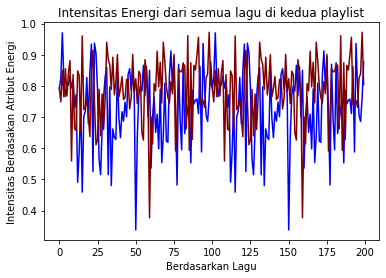

In [12]:
#  attributes berdasarkan energi
# Grafik Mencari Atribut dan Perpotongan
plt.plot(moodboost.energy, color='blue')
plt.plot(softpop.energy, color='maroon')
plt.xlabel("Berdasarkan Lagu")
plt.ylabel("Intensitas Berdasakan Atribut Energi")
plt.title("Intensitas Energi dari semua lagu di kedua playlist")

Text(0.5, 1.0, 'Intensitas loudness dari semua lagu di kedua playlist')

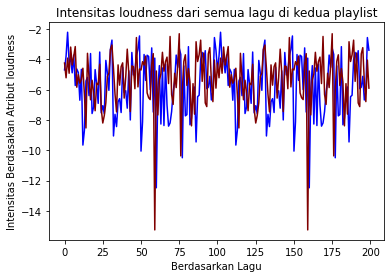

In [13]:
#  attributes berdasarkan loudness
plt.plot(moodboost.loudness, color='blue')
plt.plot(softpop.loudness, color='maroon')
plt.xlabel("Berdasarkan Lagu")
plt.ylabel("Intensitas Berdasakan Atribut loudness")
plt.title("Intensitas loudness dari semua lagu di kedua playlist")

Text(0.5, 1.0, 'Intensitas acousticness dari semua lagu di kedua playlist')

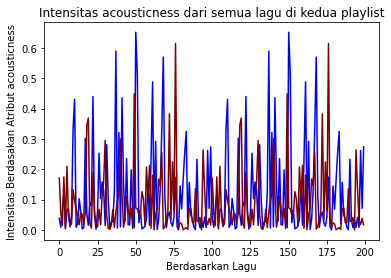

In [14]:
#  attributes berdasarkan acousticness
plt.plot(moodboost.acousticness, color='blue')
plt.plot(softpop.acousticness, color='maroon')
plt.xlabel("Berdasarkan Lagu")
plt.ylabel("Intensitas Berdasakan Atribut acousticness")
plt.title("Intensitas acousticness dari semua lagu di kedua playlist")

In [ ]:
# Mount From Collab
# In this Case We use the local terminal for upload in github, We doesn't use this
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# target
moodboost['target']=0
softpop['target']=1

In [16]:
# menggabungkan data moodboost dan softpop
df_list = (moodboost,softpop)
db = pd.concat(df_list)
db.head()



,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,MKTO,Classic,0.720,0.791,1,-4.689,1,0.1240,0.03840,0.000000,...,0.756,102.071,audio_features,6FE2iI43OZnszFLuLtvvmg,spotify:track:6FE2iI43OZnszFLuLtvvmg,https://api.spotify.com/v1/tracks/6FE2iI43OZns...,https://api.spotify.com/v1/audio-analysis/6FE2...,175427,4,0
1,Dua Lipa,Levitating (feat. DaBaby),0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,...,0.915,102.977,audio_features,5nujrmhLynf4yMoMtj8AQF,spotify:track:5nujrmhLynf4yMoMtj8AQF,https://api.spotify.com/v1/tracks/5nujrmhLynf4...,https://api.spotify.com/v1/audio-analysis/5nuj...,203064,4,0
2,Outkast,Hey Ya!,0.715,0.970,0,-2.206,1,0.0648,0.06440,0.000156,...,0.963,79.504,audio_features,3AszgPDZd9q0DpDFt4HFBy,spotify:track:3AszgPDZd9q0DpDFt4HFBy,https://api.spotify.com/v1/tracks/3AszgPDZd9q0...,https://api.spotify.com/v1/audio-analysis/3Asz...,239240,4,0
3,Harry Styles,Watermelon Sugar,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,...,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4,0
4,Farruko,Pepas,0.762,0.766,7,-3.955,1,0.0343,0.00776,0.000070,...,0.442,130.001,audio_features,2B4GHvToeLTOBB4QLzW3Ni,spotify:track:2B4GHvToeLTOBB4QLzW3Ni,https://api.spotify.com/v1/tracks/2B4GHvToeLTO...,https://api.spotify.com/v1/audio-analysis/2B4G...,287120,4,0


In [18]:
# memilih kolom yang digunakan
db2 = db[['danceability','energy','loudness','speechiness','liveness','acousticness','valence','target']]
db2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  400 non-null    float64
 1   energy        400 non-null    float64
 2   loudness      400 non-null    float64
 3   speechiness   400 non-null    float64
 4   liveness      400 non-null    float64
 5   acousticness  400 non-null    float64
 6   valence       400 non-null    float64
 7   target        400 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 28.1 KB


In [19]:
# menghilangkan data NA
db3 = db2.dropna()
db3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  400 non-null    float64
 1   energy        400 non-null    float64
 2   loudness      400 non-null    float64
 3   speechiness   400 non-null    float64
 4   liveness      400 non-null    float64
 5   acousticness  400 non-null    float64
 6   valence       400 non-null    float64
 7   target        400 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 28.1 KB


In [20]:
# check for null values
db3.isnull().values.any()

False

In [21]:
# check for integer datatypes (numpy arrays only work with integers)
db3.dtypes

danceability    float64
energy          float64
loudness        float64
speechiness     float64
liveness        float64
acousticness    float64
valence         float64
target            int64
dtype: object

In [22]:
db3['danceability']=db3['danceability'].astype(int)

In [23]:
# check for integer datatypes (numpy arrays only work with integers)
# In[9]:
db3.dtypes

danceability      int32
energy          float64
loudness        float64
speechiness     float64
liveness        float64
acousticness    float64
valence         float64
target            int64
dtype: object

## Now This Is The Main Menu
* KNN Algorithm
* Klasifikasi Menggunakan KNN Classifier

In [24]:
# Normalize/Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(db3.drop('target', axis=1))

StandardScaler()

In [25]:
scaled_features = scaler.transform(db3.drop('target',axis=1))
scaled_features

array([[ 0.        ,  0.27779409,  0.42210082, ..., -0.22215652,
        -0.50635448,  0.87679161],
       [ 0.        ,  0.57299644,  0.88892804, ..., -0.88073564,
        -0.73132814,  1.68545698],
       [ 0.        ,  1.83194763,  1.70716954, ...,  0.13065372,
        -0.30854199,  1.92958238],
       ...,
       [ 0.        ,  0.69455035, -0.66371237, ..., -0.45001314,
        -0.66384365, -1.74755638],
       [ 0.        ,  1.84931247,  0.75540096, ...,  2.31366707,
        -0.50635448,  0.89204945],
       [ 0.        ,  0.39066558, -0.20257817, ..., -1.02920994,
        -0.67221264,  0.63266622]])

In [26]:
# below is the pandas dataframe with the standardized values
gabungan_feat = pd.DataFrame(scaled_features, columns = db3.columns[:-1])
gabungan_feat.head()

,danceability,energy,loudness,speechiness,liveness,acousticness,valence
0,0.0,0.277794,0.422101,1.167921,-0.222157,-0.506354,0.876792
1,0.0,0.572996,0.888928,-0.157647,-0.880736,-0.731328,1.685457
2,0.0,1.831948,1.707170,-0.060148,0.130654,-0.308542,1.929582
3,0.0,0.494855,0.670523,-0.439771,1.086181,0.129689,-0.135312
4,0.0,0.060734,0.801980,-0.692853,-0.435313,-0.739469,-0.720195


In [28]:
#  Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = gabungan_feat
y = db3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True)


In [29]:
# Train model
# find k value


import math
math.sqrt(len(y_test))


10.954451150103322

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [31]:
# Make predictions
prediction = knn.predict(X_test)
prediction


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [32]:
# Evaluate Predictions using the Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        63
           1       0.69      0.67      0.68        57

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120



In [33]:
#  Evaluate alternative K-values for better predictions
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))


Text(0, 0.5, 'error rate')

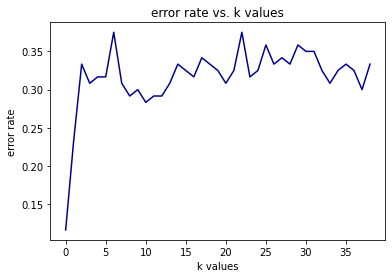

In [34]:
# Plot error rate
plt.plot(error_rate, color='darkblue')
plt.title('error rate vs. k values')
plt.xlabel('k values')
plt.ylabel('error rate')

In [35]:
# Adjust K value according to the graph (lowest error rate)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
prediction= knn.predict(X_test)
prediction

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        63
           1       0.69      0.61      0.65        57

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.68      0.68      0.68       120

